   age  sex   BP  cholestrol  heart disease
0   70    1  130         322              1
1   67    0  115         564              0
2   57    1  124         261              1
3   64    1  128         263              0
4   74    0  120         269              0


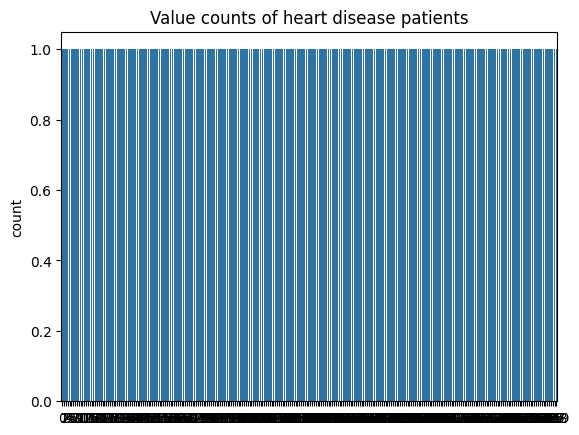

(189, 4) (81, 4)
Time taken to fit the model: 0.23339223861694336 seconds
OOB Score: 0.656084656084656
Fitting 4 folds for each of 180 candidates, totalling 720 fits
Time taken for grid search: 18.46 seconds
Best cross-validation accuracy score: 0.6985815602836879
Best parameters: {'max_depth': 5, 'min_samples_leaf': 10, 'n_estimators': 10}
Best model: RandomForestClassifier(max_depth=5, min_samples_leaf=10, n_estimators=10,
                       n_jobs=-1, random_state=42)
Number of trees in the best model: 10


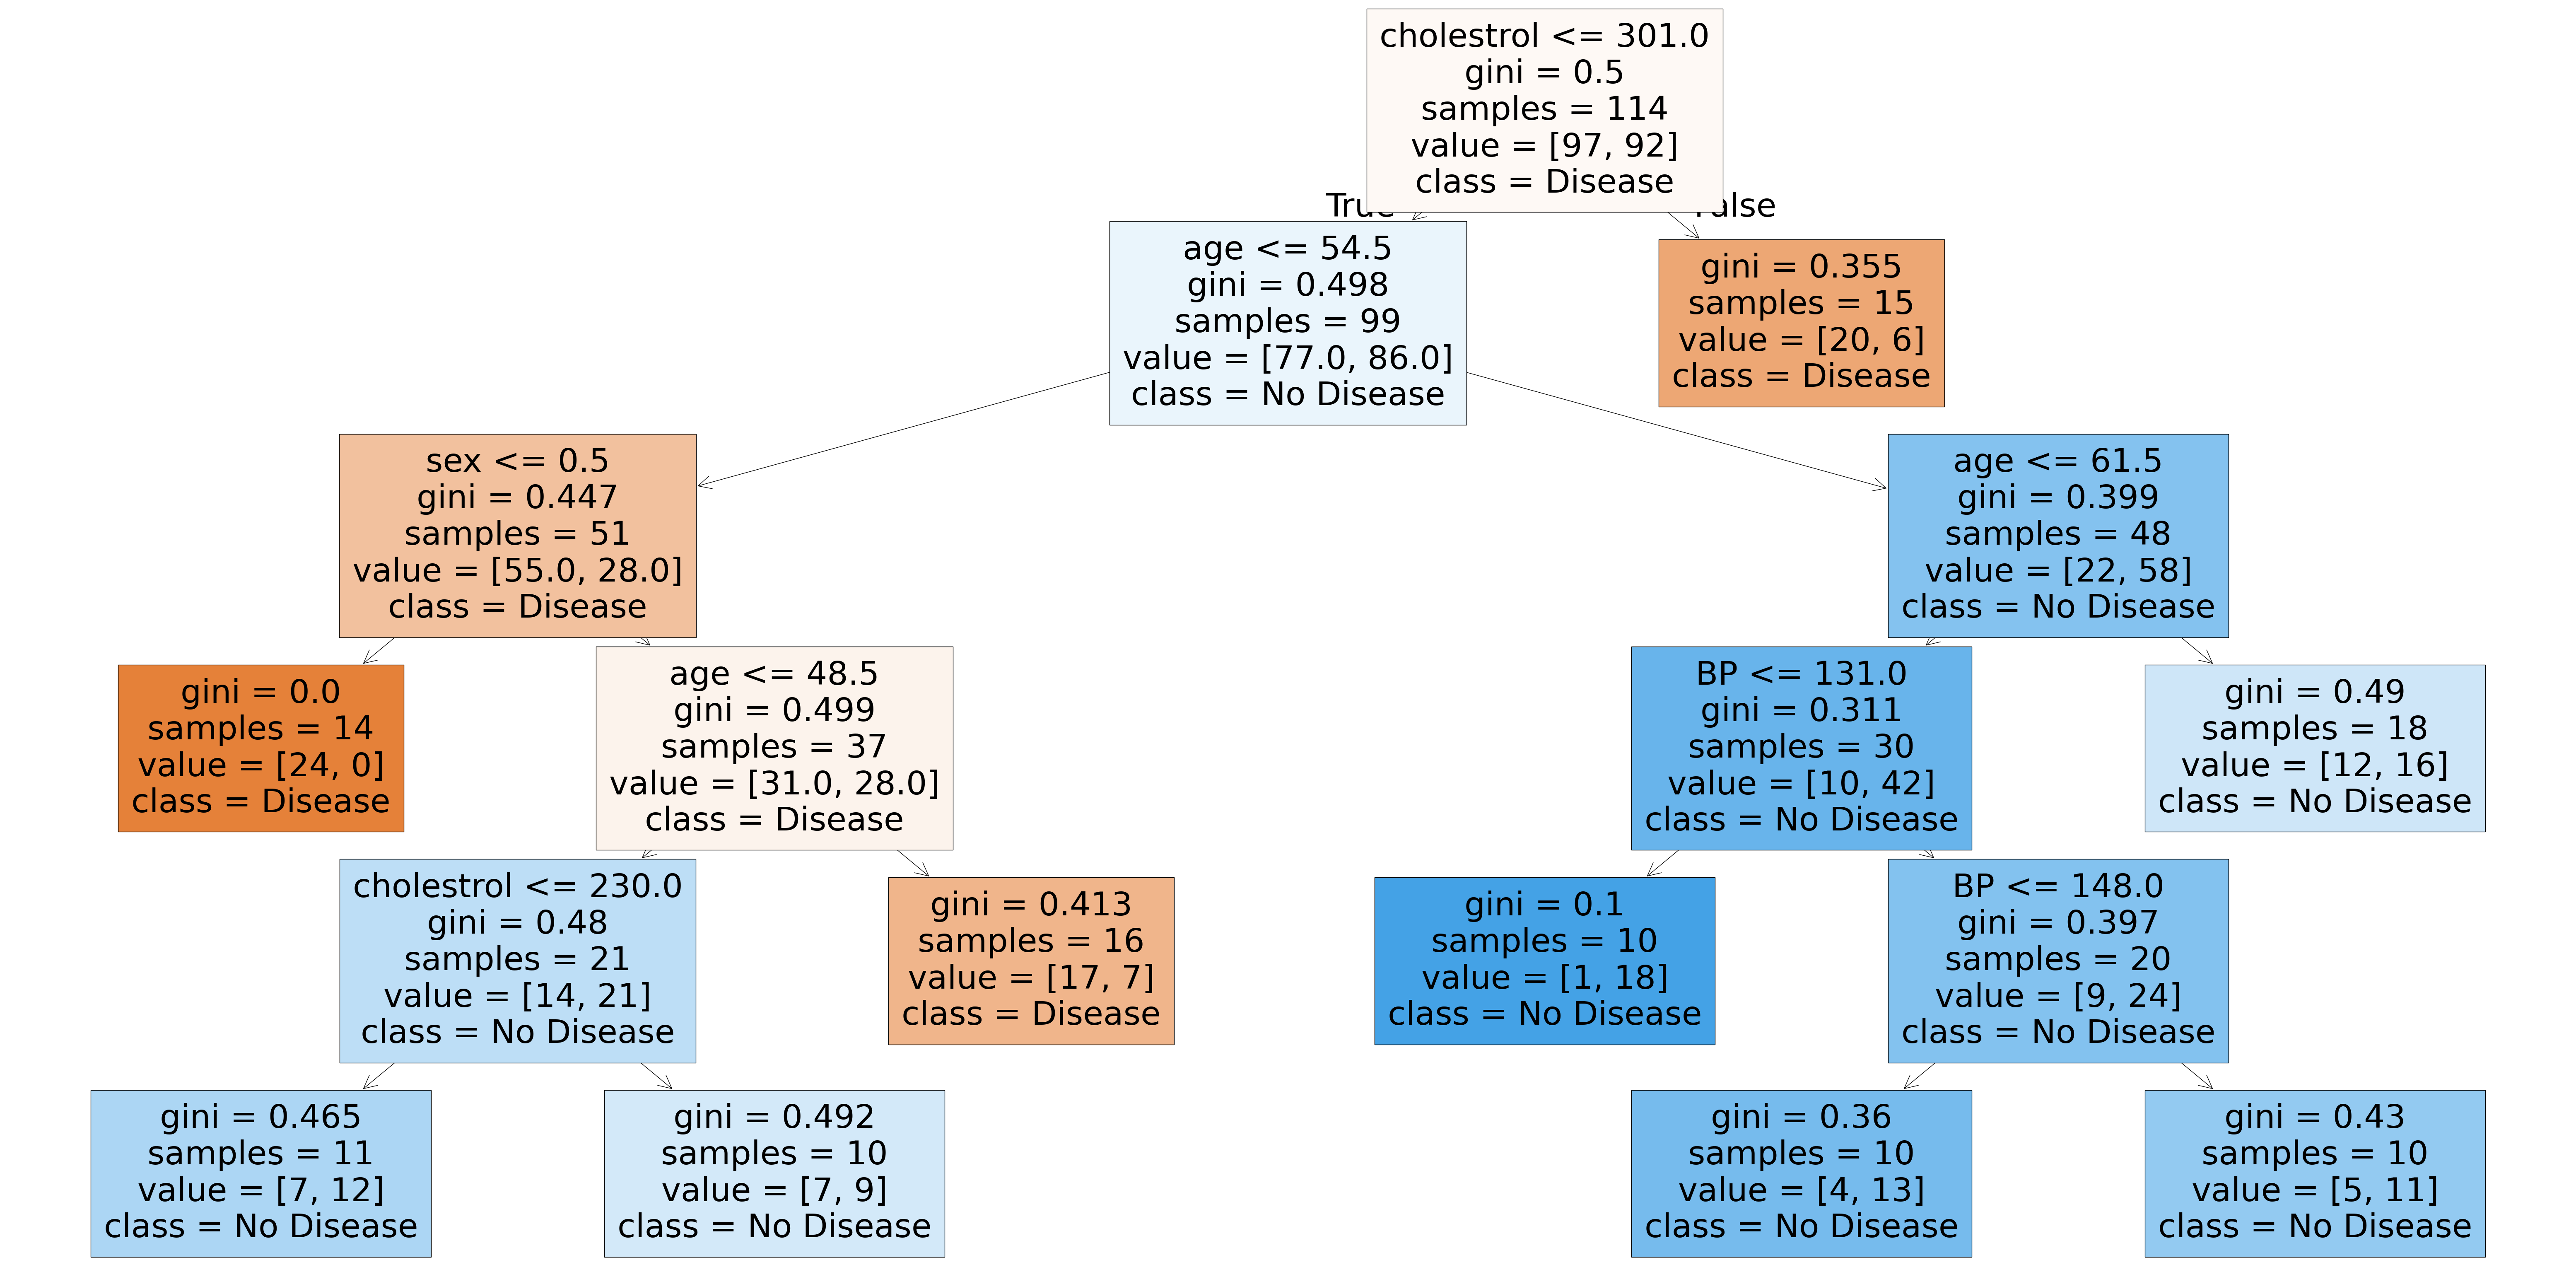

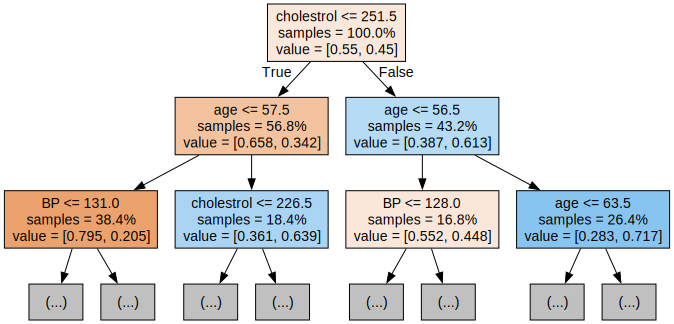

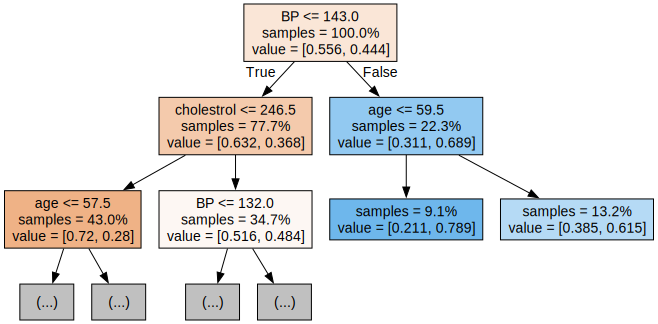

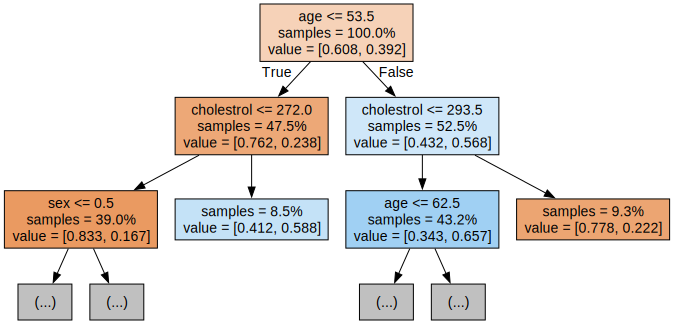

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters: {'max_depth': 6, 'n_estimators': 185}
Accuracy: 0.654320987654321
Precision: 0.5526315789473685
Recall: 0.65625


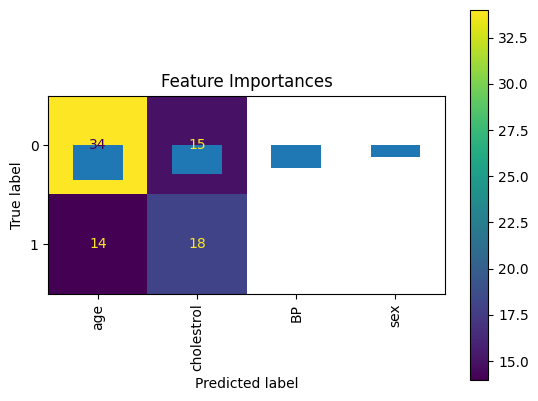

In [1]:
# 1. Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score
from sklearn.tree import plot_tree, export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import randint
import time
import graphviz

# 2. Load and display the dataset
df = pd.read_csv('heart_v2.csv')
print(df.head())
sns.countplot(df['heart disease'])
plt.title('Value counts of heart disease patients')
plt.show()

# 3. Feature and label separation
X = df.drop('heart disease', axis=1)
y = df['heart disease']

# 4. Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
print(X_train.shape, X_test.shape)

# 5. Train Random Forest Classifier
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5, n_estimators=100, oob_score=True)
start_time = time.time()
classifier_rf.fit(X_train, y_train)
print(f"Time taken to fit the model: {time.time() - start_time} seconds")
print(f"OOB Score: {classifier_rf.oob_score_}")

# 6. Grid Search for hyperparameter tuning
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100, 200],
    'n_estimators': [10, 25, 30, 50, 100, 200]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42, n_jobs=-1),
                           param_grid=params, cv=4, n_jobs=-1, verbose=1, scoring="accuracy")

start_time = time.time()
grid_search.fit(X_train, y_train)
print(f"Time taken for grid search: {time.time() - start_time:.2f} seconds")
print(f"Best cross-validation accuracy score: {grid_search.best_score_}")
print(f"Best parameters: {grid_search.best_params_}")

# 7. Best model from Grid Search
rf_best = grid_search.best_estimator_
print(f"Best model: {rf_best}")

# 8. Plot a decision tree
print(f"Number of trees in the best model: {len(rf_best.estimators_)}")
plt.figure(figsize=(80, 40))
plot_tree(rf_best.estimators_[5], feature_names=X.columns, class_names=['Disease', 'No Disease'], filled=True)
plt.show()

# 9. Export first 3 decision trees as Graphviz
rf_best.fit(X_train, y_train)
for i in range(3):
    tree = rf_best.estimators_[i]
    dot_data = export_graphviz(tree, feature_names=X_train.columns, filled=True,
                               max_depth=2, impurity=False, proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

# 10. Randomized Search
param_dist = {'n_estimators': randint(50, 500), 'max_depth': randint(1, 20)}
rand_search = RandomizedSearchCV(RandomForestClassifier(), param_distributions=param_dist,
                                 n_iter=5, cv=5, n_jobs=-1, verbose=1)
rand_search.fit(X_train, y_train)
print(f"Best parameters: {rand_search.best_params_}")

# 11. Evaluation with best model from Randomized Search
best_rf = rand_search.best_estimator_
y_pred = best_rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

# 12. KNN Comparison
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn))
print("Recall:", recall_score(y_test, y_pred_knn))

# 13. Feature Importance Plot
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_importances.plot.bar()
plt.title("Feature Importances")
plt.show()


In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
# Define the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
# Train the KNN model (assuming you have X_train and y_train)
knn.fit(X_train, y_train)
# Generate predictions with the trained KNN model
y_pred = knn.predict(X_test)
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.654320987654321
Precision: 0.5526315789473685
Recall: 0.65625


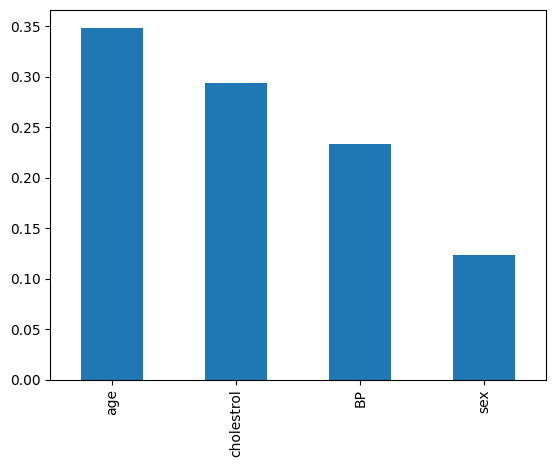

In [5]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
# Plot a simple bar chart
feature_importances.plot.bar();
